In [1]:
# 使用不同model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt 
import math
%matplotlib inline 

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Input File

In [4]:
Data_train=pd.read_csv('./data/train.csv')

Data_test=pd.read_csv('./data/test.csv')

Data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 對SalePrice去skewness

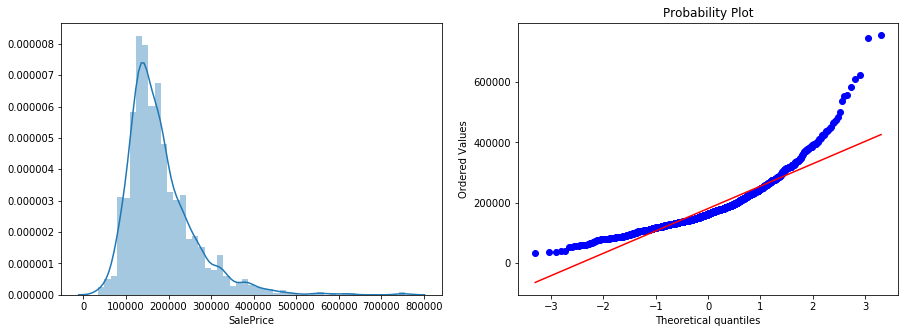

In [5]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(Data_train['SalePrice'])

plt.subplot(1,2,2)
res = stats.probplot(Data_train['SalePrice'], plot=plt)

In [6]:
Data_train["SalePrice"]=Data_train["SalePrice"].apply(np.log)

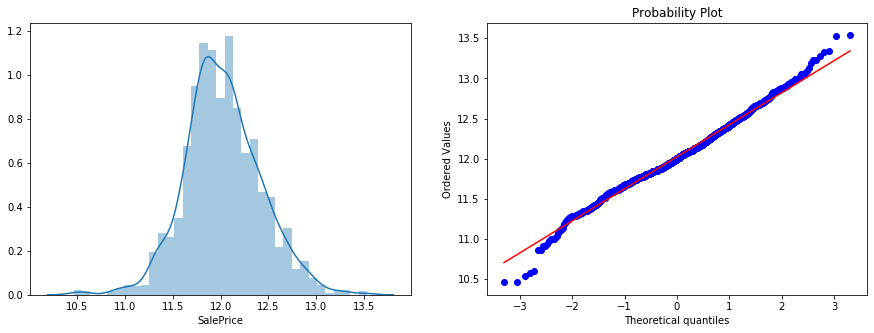

In [7]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(Data_train['SalePrice'])

plt.subplot(1,2,2)
res = stats.probplot(Data_train['SalePrice'], plot=plt)

# 填補空值

In [8]:
train_label=Data_train['SalePrice']

In [9]:
Data_train.drop('SalePrice',axis=1,inplace=True)

In [10]:
AllData=pd.concat([Data_train,Data_test],axis=0)

In [11]:
AllData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [12]:
AllData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [13]:
plotNaN=AllData.isna().sum().sort_values()/len(AllData)
plotNaN=pd.DataFrame(plotNaN)
plotNaN.columns=['Nan_percentage']
plotNaN=plotNaN[plotNaN['Nan_percentage']!=0]
plotNaN

,Nan_percentage
GarageCars,0.000343
GarageArea,0.000343
KitchenQual,0.000343
Electrical,0.000343
SaleType,0.000343
TotalBsmtSF,0.000343
BsmtUnfSF,0.000343
BsmtFinSF2,0.000343
Exterior2nd,0.000343
Exterior1st,0.000343


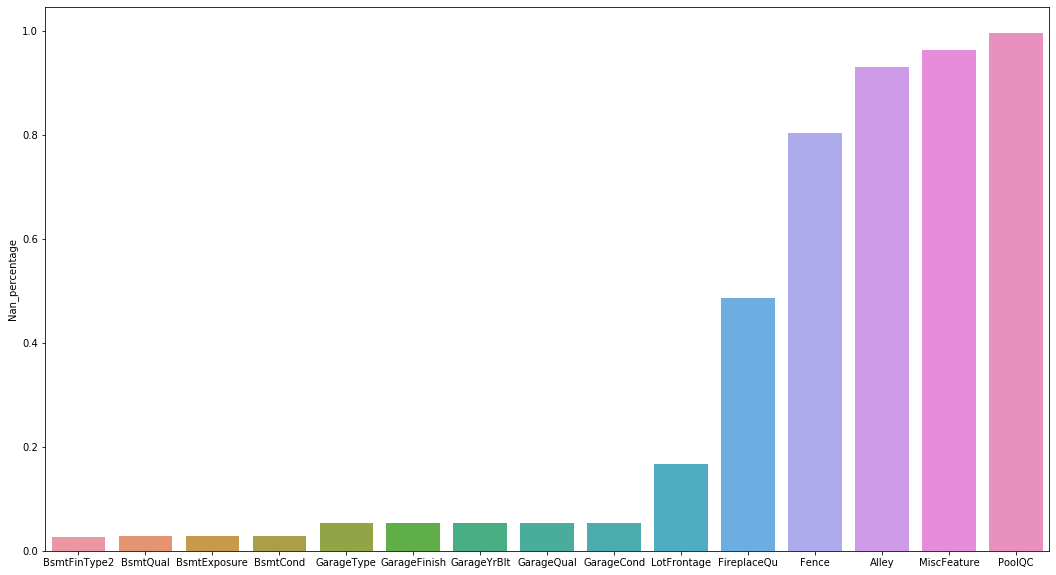

In [14]:
fig = plt.figure(figsize=(18,10))
sns.barplot(x=plotNaN.index[-15:],y='Nan_percentage',data=plotNaN[-15:])

In [15]:
## Some missing values are intentionally left blank, for example: In the Alley feature 
## there are blank values meaning that there are no alley's in that specific house. 
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    AllData[i] = AllData[i].fillna('None')

In [16]:
## In the following features the null values are there for a purpose, so we replace them with "0"
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    AllData[i] = AllData[i].fillna(0)

In [17]:
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
AllData['LotFrontage'] = AllData.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [18]:
AllData['Exterior2nd'] = AllData.fillna(AllData['Exterior2nd'].mode().values[0])
AllData['KitchenQual'] = AllData.fillna(AllData['KitchenQual'].mode().values[0])
AllData['Electrical'] = AllData.fillna(AllData['Electrical'].mode().values[0])
AllData['Exterior1st'] = AllData.fillna(AllData['Exterior1st'].mode().values[0])
AllData['SaleType'] = AllData.fillna(AllData['SaleType'].mode().values[0])
AllData['Utilities'] = AllData.fillna(AllData['Utilities'].mode().values[0])
AllData['Functional'] = AllData.fillna(AllData['Functional'].mode().values[0])
AllData['MSZoning'] = AllData.fillna(AllData['MSZoning'].mode().values[0])

In [19]:
plotNaN=AllData.isna().sum().sort_values()/len(AllData)
plotNaN=pd.DataFrame(plotNaN)
plotNaN.columns=['Nan_percentage']
plotNaN=plotNaN[plotNaN['Nan_percentage']!=0]
plotNaN

,Nan_percentage


# 去除outlier

In [20]:
Data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


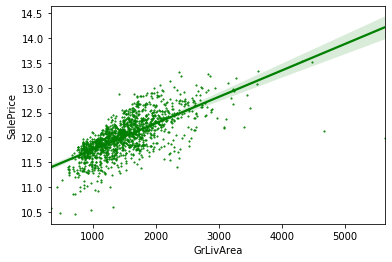

In [21]:
#GrLivArea
sns.regplot(x="GrLivArea", y=train_label, data=Data_train, marker='*', color='green', scatter_kws={'s':2})

In [22]:
Data_train[Data_train['GrLivArea']>4500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,10,2007,New,Partial
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,0,480,Gd,NaN,NaN,0,1,2008,New,Partial


In [23]:
print('AllData:',AllData.shape)
print('Data_train:',Data_train.shape)
print('Data_test:',Data_test.shape)
#train_label

AllData: (2919, 80)
Data_train: (1460, 80)
Data_test: (1459, 80)


In [24]:
outliers = [ 524, 1299]
Data_train=AllData[:len(Data_train)]
Data_test=AllData[len(Data_train):]
Data_train=pd.concat([Data_train,train_label],axis=1)
Data_train=Data_train[Data_train['GrLivArea']<=4500]

AllData=pd.concat([Data_train,Data_test],axis=0)
AllData=AllData.drop('SalePrice',axis=1)
train_label=Data_train['SalePrice']

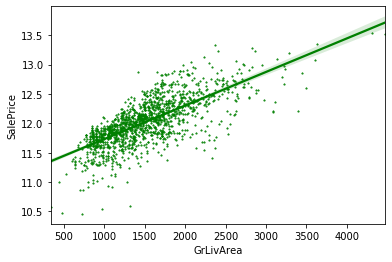

In [25]:
#GrLivArea
sns.regplot(x="GrLivArea", y=train_label, data=Data_train, marker='*', color='green', scatter_kws={'s':2})

# 特徵工程

In [26]:
# feture engineering a new feature "TotalFS"
AllData['TotalSF'] = (AllData['TotalBsmtSF'] + AllData['1stFlrSF'] + AllData['2ndFlrSF'])
AllData['YrBltAndRemod'] = AllData['YearBuilt'] + AllData['YearRemodAdd']
AllData['Total_sqr_footage'] = (AllData['BsmtFinSF1'] + AllData['BsmtFinSF2'] + AllData['1stFlrSF'] + AllData['2ndFlrSF'])
AllData['Total_Bathrooms'] = (AllData['FullBath'] + (0.5 * AllData['HalfBath']) + AllData['BsmtFullBath'] + (0.5 * AllData['BsmtHalfBath']))
AllData['Total_porch_sf'] = (AllData['OpenPorchSF'] + AllData['3SsnPorch'] + AllData['EnclosedPorch'] + AllData['ScreenPorch'] + AllData['WoodDeckSF'])

In [27]:
AllData['haspool'] = AllData['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
AllData['has2ndfloor'] = AllData['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
AllData['hasgarage'] = AllData['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
AllData['hasbsmt'] = AllData['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
AllData['hasfireplace'] = AllData['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [28]:
AllData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1,60,1,65.0,8450,Pave,None,Reg,Lvl,1,...,2566.0,4006,2416.0,3.5,61,0,1,1,1,0
1,2,20,2,80.0,9600,Pave,None,Reg,Lvl,2,...,2524.0,3952,2240.0,2.5,298,0,0,1,1,1
2,3,60,3,68.0,11250,Pave,None,IR1,Lvl,3,...,2706.0,4003,2272.0,3.5,42,0,1,1,1,1
3,4,70,4,60.0,9550,Pave,None,IR1,Lvl,4,...,2473.0,3885,1933.0,2.0,307,0,1,1,1,1
4,5,60,5,84.0,14260,Pave,None,IR1,Lvl,5,...,3343.0,4000,2853.0,3.5,276,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,2915,21.0,1936,Pave,None,Reg,Lvl,2915,...,1638.0,3940,1092.0,1.5,0,0,1,0,1,0
1455,2916,160,2916,21.0,1894,Pave,None,Reg,Lvl,2916,...,1638.0,3940,1344.0,1.5,24,0,1,1,1,0
1456,2917,20,2917,160.0,20000,Pave,None,Reg,Lvl,2917,...,2448.0,3956,2448.0,2.0,474,0,0,1,1,1
1457,2918,85,2918,62.0,10441,Pave,None,Reg,Lvl,2918,...,1882.0,3984,1307.0,1.5,112,0,0,0,1,0


# 對Features去偏斜化

In [30]:
valCol=AllData.select_dtypes(include=['float','int']).columns
valCol

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'TotalSF', 'YrBltAndRemod',
       'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'haspool',
       'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace'],
      dtype='object')

In [31]:
skewness=AllData[valCol].skew(axis = 0, skipna = True) 
skewness

Id                   -0.000867
MSSubClass            1.375838
LotFrontage           1.058290
LotArea              13.116240
OverallQual           0.189688
OverallCond           0.569607
YearBuilt            -0.599503
YearRemodAdd         -0.450365
MasVnrArea            2.623068
BsmtFinSF1            0.981149
BsmtFinSF2            4.146636
BsmtUnfSF             0.920161
TotalBsmtSF           0.672097
1stFlrSF              1.257933
2ndFlrSF              0.861999
LowQualFinSF         12.090757
GrLivArea             1.069300
BsmtFullBath          0.622735
BsmtHalfBath          3.932018
FullBath              0.165599
HalfBath              0.697024
BedroomAbvGr          0.326736
KitchenAbvGr          4.302763
TotRmsAbvGrd          0.749618
Fireplaces            0.725651
GarageYrBlt          -3.906642
GarageCars           -0.219410
GarageArea            0.216968
WoodDeckSF            1.845741
OpenPorchSF           2.530660
EnclosedPorch         4.004404
3SsnPorch            11.377932
ScreenPo

In [32]:
"""for i, col in enumerate(valCol):
    #print(col)
    #plt.figure(i)
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)

    try:
        sns.distplot(AllData[col])
    except RuntimeError as re:
        if(str(re).startswith("Selected KDE bandwidth is 0. Cannot estiamte density.")):
            sns.distplot(AllData[col], kde_kws={'bw': 0.1})
        else:
            raise re
    plt.subplot(1,2,2)
    res = stats.probplot(AllData[col], plot=plt)"""

'for i, col in enumerate(valCol):\n    #print(col)\n    #plt.figure(i)\n    fig = plt.figure(figsize=(15,5))\n    plt.subplot(1,2,1)\n\n    try:\n        sns.distplot(AllData[col])\n    except RuntimeError as re:\n        if(str(re).startswith("Selected KDE bandwidth is 0. Cannot estiamte density.")):\n            sns.distplot(AllData[col], kde_kws={\'bw\': 0.1})\n        else:\n            raise re\n    plt.subplot(1,2,2)\n    res = stats.probplot(AllData[col], plot=plt)'

In [33]:
skewCol=skewness[abs(skewness) > 0.75].index
skewCol

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'GarageYrBlt',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalSF', 'Total_sqr_footage',
       'Total_porch_sf', 'haspool', 'hasgarage', 'hasbsmt'],
      dtype='object')

In [34]:
'''for i, col in enumerate(skewCol):
    #print(col)
    #plt.figure(i)
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)

    try:
        sns.distplot(AllData[col])
    except RuntimeError as re:
        if(str(re).startswith("Selected KDE bandwidth is 0. Cannot estiamte density.")):
            sns.distplot(AllData[col], kde_kws={'bw': 0.1})
        else:
            raise re
    plt.subplot(1,2,2)
    res = stats.probplot(AllData[col], plot=plt)'''

'for i, col in enumerate(skewCol):\n    #print(col)\n    #plt.figure(i)\n    fig = plt.figure(figsize=(15,5))\n    plt.subplot(1,2,1)\n\n    try:\n        sns.distplot(AllData[col])\n    except RuntimeError as re:\n        if(str(re).startswith("Selected KDE bandwidth is 0. Cannot estiamte density.")):\n            sns.distplot(AllData[col], kde_kws={\'bw\': 0.1})\n        else:\n            raise re\n    plt.subplot(1,2,2)\n    res = stats.probplot(AllData[col], plot=plt)'

In [35]:
AllData[skewCol].skew(axis = 0, skipna = True) 

MSSubClass            1.375838
LotFrontage           1.058290
LotArea              13.116240
MasVnrArea            2.623068
BsmtFinSF1            0.981149
BsmtFinSF2            4.146636
BsmtUnfSF             0.920161
1stFlrSF              1.257933
2ndFlrSF              0.861999
LowQualFinSF         12.090757
GrLivArea             1.069300
BsmtHalfBath          3.932018
KitchenAbvGr          4.302763
GarageYrBlt          -3.906642
WoodDeckSF            1.845741
OpenPorchSF           2.530660
EnclosedPorch         4.004404
3SsnPorch            11.377932
ScreenPorch           3.947131
PoolArea             17.697766
MiscVal              21.950962
TotalSF               1.009676
Total_sqr_footage     1.254311
Total_porch_sf        1.380231
haspool              15.502729
hasgarage            -3.941480
hasbsmt              -5.829823
dtype: float64

In [36]:
#logData=AllData[skewCol]

In [37]:
'''def fun(x):
    if(x>0):
        return math.log(x)
    else:
        return 0'''

'def fun(x):\n    if(x>0):\n        return math.log(x)\n    else:\n        return 0'

In [38]:
boxcoxData=AllData[skewCol]
boxcoxData.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,Total_sqr_footage,Total_porch_sf,haspool,hasgarage,hasbsmt
0,60,65.0,8450,196.0,706.0,0.0,150.0,856,854,0,...,0,0,0,0,2566.0,2416.0,61,0,1,1
1,20,80.0,9600,0.0,978.0,0.0,284.0,1262,0,0,...,0,0,0,0,2524.0,2240.0,298,0,1,1
2,60,68.0,11250,162.0,486.0,0.0,434.0,920,866,0,...,0,0,0,0,2706.0,2272.0,42,0,1,1
3,70,60.0,9550,0.0,216.0,0.0,540.0,961,756,0,...,0,0,0,0,2473.0,1933.0,307,0,1,1
4,60,84.0,14260,350.0,655.0,0.0,490.0,1145,1053,0,...,0,0,0,0,3343.0,2853.0,276,0,1,1


In [39]:
from scipy.special import boxcox1p
skewed_features = skewCol
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    boxcoxData[feat] = boxcox1p(boxcoxData[feat], lam)

In [40]:
'''for i in logData.columns:
    #print(i)
    logData[i]=logData[i].apply(fun)'''

'for i in logData.columns:\n    #print(i)\n    logData[i]=logData[i].apply(fun)'

In [41]:
'''logData.skew(axis = 0, skipna = True) '''

'logData.skew(axis = 0, skipna = True) '

In [42]:
'''for i, col in enumerate(logData.columns):
    #print(col)
    #plt.figure(i)
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)

    try:
        sns.distplot(logData[col])
    except RuntimeError as re:
        if(str(re).startswith("Selected KDE bandwidth is 0. Cannot estiamte density.")):
            sns.distplot(logData[col], kde_kws={'bw': 0.1})
        else:
            raise re
    plt.subplot(1,2,2)
    res = stats.probplot(logData[col], plot=plt)'''

'for i, col in enumerate(logData.columns):\n    #print(col)\n    #plt.figure(i)\n    fig = plt.figure(figsize=(15,5))\n    plt.subplot(1,2,1)\n\n    try:\n        sns.distplot(logData[col])\n    except RuntimeError as re:\n        if(str(re).startswith("Selected KDE bandwidth is 0. Cannot estiamte density.")):\n            sns.distplot(logData[col], kde_kws={\'bw\': 0.1})\n        else:\n            raise re\n    plt.subplot(1,2,2)\n    res = stats.probplot(logData[col], plot=plt)'

### 選定會做去skewness的feature有'LotArea','1stFlrSF','GrLivArea','TotalSF','Total_sqr_footage'

In [43]:
skewCol

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'GarageYrBlt',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalSF', 'Total_sqr_footage',
       'Total_porch_sf', 'haspool', 'hasgarage', 'hasbsmt'],
      dtype='object')

In [44]:
#skewCol=['1stFlrSF','GrLivArea','TotalSF','Total_sqr_footage']
#skewCol=['GrLivArea','1stFlrSF','Total_sqr_footage']

In [45]:
AllData[skewCol]=boxcoxData[skewCol]

# Encoding

In [46]:
#使用全部feature 進行訓練
AllData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1,5.684507,1,5.831328,19.212182,Pave,None,Reg,Lvl,1,...,14.976591,4006,14.781997,3.5,5.714669,0.0,1,0.730463,0.730463,0
1,2,3.858807,2,6.221214,19.712205,Pave,None,Reg,Lvl,2,...,14.923100,3952,14.540127,2.5,9.010206,0.0,0,0.730463,0.730463,1
2,3,5.684507,3,5.914940,20.347241,Pave,None,IR1,Lvl,3,...,15.149678,4003,14.585277,3.5,5.053371,0.0,1,0.730463,0.730463,1
3,4,5.968981,4,5.684507,19.691553,Pave,None,IR1,Lvl,4,...,14.857121,3885,14.076603,2.0,9.080098,0.0,1,0.730463,0.730463,1
4,5,5.684507,5,6.314735,21.325160,Pave,None,IR1,Lvl,5,...,15.852312,4000,15.323415,3.5,8.831514,0.0,1,0.730463,0.730463,1


In [48]:
#object to int 
Object_int=['MSZoning','Utilities' ,'Exterior1st','Exterior2nd','Electrical','KitchenQual','Functional','SaleType']
for i in Object_int:
    AllData[i]=AllData[i].astype('int')

In [49]:
Float_int=['BsmtFullBath','BsmtHalfBath','GarageCars']
for i in Float_int:
    AllData[i]=AllData[i].astype('int')

In [50]:
AllDataId=AllData['Id']
AllData=AllData.drop('Id',axis=1)

In [51]:
AllData = pd.get_dummies(AllData).reset_index(drop=True)
AllData.shape

(2917, 256)

In [52]:
AllData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5.684507,1,5.831328,19.212182,1,7,5,2003,2003,1,...,1,0,0,0,0,0,0,0,1,0
1,3.858807,2,6.221214,19.712205,2,6,8,1976,1976,2,...,1,0,0,0,0,0,0,0,1,0
2,5.684507,3,5.914940,20.347241,3,7,5,2001,2002,3,...,1,0,0,0,0,0,0,0,1,0
3,5.968981,4,5.684507,19.691553,4,7,5,1915,1970,4,...,1,0,0,0,1,0,0,0,0,0
4,5.684507,5,6.314735,21.325160,5,8,5,2000,2000,5,...,1,0,0,0,0,0,0,0,1,0


In [53]:
AllData.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Utilities',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st',
       ...
       'MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'MiscFeature_TenC', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=256)

In [54]:
#Selected_AllData=AllData[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','KitchenQual']]
Selected_AllData=AllData
Selected_AllData

,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5.684507,1,5.831328,19.212182,1,7,5,2003,2003,1,...,1,0,0,0,0,0,0,0,1,0
1,3.858807,2,6.221214,19.712205,2,6,8,1976,1976,2,...,1,0,0,0,0,0,0,0,1,0
2,5.684507,3,5.914940,20.347241,3,7,5,2001,2002,3,...,1,0,0,0,0,0,0,0,1,0
3,5.968981,4,5.684507,19.691553,4,7,5,1915,1970,4,...,1,0,0,0,1,0,0,0,0,0
4,5.684507,5,6.314735,21.325160,5,8,5,2000,2000,5,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,7.620056,2915,3.932510,14.081426,2915,4,7,1970,1970,2915,...,1,0,0,0,0,0,0,0,1,0
2913,7.620056,2916,3.932510,14.013314,2916,4,5,1970,1970,2916,...,1,0,0,0,1,0,0,0,0,0
2914,3.858807,2917,7.620056,22.782058,2917,5,7,1960,1996,2917,...,1,0,0,0,1,0,0,0,0,0
2915,6.337529,2918,5.744420,20.046557,2918,5,5,1992,1992,2918,...,0,0,1,0,0,0,0,0,1,0


In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
Selected_AllData

,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5.684507,1,5.831328,19.212182,1,7,5,2003,2003,1,...,1,0,0,0,0,0,0,0,1,0
1,3.858807,2,6.221214,19.712205,2,6,8,1976,1976,2,...,1,0,0,0,0,0,0,0,1,0
2,5.684507,3,5.914940,20.347241,3,7,5,2001,2002,3,...,1,0,0,0,0,0,0,0,1,0
3,5.968981,4,5.684507,19.691553,4,7,5,1915,1970,4,...,1,0,0,0,1,0,0,0,0,0
4,5.684507,5,6.314735,21.325160,5,8,5,2000,2000,5,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,7.620056,2915,3.932510,14.081426,2915,4,7,1970,1970,2915,...,1,0,0,0,0,0,0,0,1,0
2913,7.620056,2916,3.932510,14.013314,2916,4,5,1970,1970,2916,...,1,0,0,0,1,0,0,0,0,0
2914,3.858807,2917,7.620056,22.782058,2917,5,7,1960,1996,2917,...,1,0,0,0,1,0,0,0,0,0
2915,6.337529,2918,5.744420,20.046557,2918,5,5,1992,1992,2918,...,0,0,1,0,0,0,0,0,1,0


In [57]:
list1=[]
for i in Selected_AllData.columns:
    #print(Selected_AllData[i].max())
    if(Selected_AllData[i].max()>1):
        list1.append(i)
list1

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Utilities',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'TotalSF',
 'YrBltAndRemod',
 'Total_sqr_footage',
 'Total_Bathrooms',
 'Total_porch_sf']

In [58]:
df1 = Selected_AllData[list1]
df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
0,5.684507,1,5.831328,19.212182,1,7,5,2003,2003,1,...,0.0,0.000000,2,2008,1,14.976591,4006,14.781997,3.5,5.714669
1,3.858807,2,6.221214,19.712205,2,6,8,1976,1976,2,...,0.0,0.000000,5,2007,2,14.923100,3952,14.540127,2.5,9.010206
2,5.684507,3,5.914940,20.347241,3,7,5,2001,2002,3,...,0.0,0.000000,9,2008,3,15.149678,4003,14.585277,3.5,5.053371
3,5.968981,4,5.684507,19.691553,4,7,5,1915,1970,4,...,0.0,0.000000,2,2006,4,14.857121,3885,14.076603,2.0,9.080098
4,5.684507,5,6.314735,21.325160,5,8,5,2000,2000,5,...,0.0,0.000000,12,2008,5,15.852312,4000,15.323415,3.5,8.831514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,7.620056,2915,3.932510,14.081426,2915,4,7,1970,1970,2915,...,0.0,0.000000,6,2006,2915,13.567978,3940,12.374860,1.5,0.000000
2913,7.620056,2916,3.932510,14.013314,2916,4,5,1970,1970,2916,...,0.0,0.000000,4,2006,2916,13.567978,3940,12.976752,1.5,4.137711
2914,3.858807,2917,7.620056,22.782058,2917,5,7,1960,1996,2917,...,0.0,0.000000,9,2006,2917,14.824355,3956,14.824355,2.0,10.137338
2915,6.337529,2918,5.744420,20.046557,2918,5,5,1992,1992,2918,...,0.0,11.147538,7,2006,2918,13.993617,3984,12.894732,1.5,6.881187


In [59]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Selected_AllData[list1]=scaler.fit_transform(Selected_AllData[list1])
Selected_AllData'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nSelected_AllData[list1]=scaler.fit_transform(Selected_AllData[list1])\nSelected_AllData'

# 訓練模型

In [72]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV, Lasso, LinearRegression, BayesianRidge
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [60]:
Data_train=Selected_AllData[:len(Data_train)]
Data_test=Selected_AllData[len(Data_train):]
X=Data_train
y=train_label

### linear regression

In [61]:
Scores={}
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
clf = LinearRegression()
#scores = cross_val_score(clf, X, y, cv=5,scoring = 'neg_mean_squared_error')
scores= np.sqrt(-cross_val_score(clf, X, y, cv=5,scoring = 'neg_mean_squared_error'))
Scores['linear regression']=scores.mean()
print('linear regression 平均準確率:'+str(scores.mean()))

linear regression 平均準確率:7551.087388331801


In [62]:
Scores

{'linear regression': 7551.087388331801}

### Lasso

In [63]:
lasso = LassoCV()
#scores = cross_val_score(clf, X, y, cv=5,scoring = 'neg_mean_squared_error')
scores= np.sqrt(-cross_val_score(lasso, X, y, cv=5,scoring = 'neg_mean_squared_error'))
Scores['Lasso regression']=scores.mean()
print('Lasso regression 平均準確率:'+str(scores.mean()))

Lasso regression 平均準確率:0.1888677430280229


### Ridge

In [97]:
ridge = RidgeCV()
#scores = cross_val_score(clf, X, y, cv=5,scoring = 'neg_mean_squared_error')
scores= np.sqrt(-cross_val_score(ridge, X, y, cv=5,scoring = 'neg_mean_squared_error'))
Scores['Ridge regression']=scores.mean()
print('Ridge regression 平均準確率:'+str(scores.mean()))

Ridge regression 平均準確率:0.11555550598434867


###  Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)
scores= np.sqrt(-cross_val_score(rf, X, y, cv=5,scoring = 'neg_mean_squared_error'))
Scores['Random Forest regression']=scores.mean()
print('Random Forest regression 平均準確率:'+str(scores.mean()))

### AdaBoostRegressor

In [79]:
adar = AdaBoostRegressor(n_estimators=4000,
                         learning_rate=0.01,
                         loss='linear',
                        random_state=42,)

In [81]:
scores= np.sqrt(-cross_val_score(adar, X, y, cv=5,scoring = 'neg_mean_squared_error'))
Scores['AdaBoost regression']=scores.mean()
print('AdaBoost regression 平均準確率:'+str(scores.mean()))

AdaBoost regression 平均準確率:0.1637945663421261


### Gradient Boosting Regressor

In [82]:
gbr = GradientBoostingRegressor(n_estimators=3000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

In [83]:
scores= np.sqrt(-cross_val_score(gbr, X, y, cv=5,scoring = 'neg_mean_squared_error'))
Scores['Gradient Boosting regression']=scores.mean()
print('Gradient Boosting regression 平均準確率:'+str(scores.mean()))

Gradient Boosting regression 平均準確率:0.11558861647607552


### LightGradientBoosting regresso

In [84]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, # This is the maximum number of bins the features will be bucketed in.
                       bagging_fraction=0.8,
                       bagging_freq=4, # Means: perform the bagging every 4 iterations
                       bagging_seed=42, # Equivalent of random_state but with bagging.
                       feature_fraction=0.2, # As usual, the faction of features that will be randomly selected to build trees at each iteration
                       feature_fraction_seed=42, # Equivalent of random_state but with the feature_fraction
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1, # To shut down the messages
                       random_state=42)

In [85]:
scores= np.sqrt(-cross_val_score(lightgbm, X, y, cv=5,scoring = 'neg_mean_squared_error'))
Scores['Light Gradient  Boosting regression']=scores.mean()
print('Light Gradient  Boosting regression 平均準確率:'+str(scores.mean()))

Light Gradient  Boosting regression 平均準確率:0.11810693644960357


### XGBoost Regressor 未完成

In [101]:
# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=7000,
                       max_depth=8,
                       min_child_weight=10,
                       gamma=0.6,
                       subsample=0.5,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       seed=42,
                       reg_alpha=0.006,
                       random_state=42)

In [86]:
Scores

{'linear regression': 7551.087388331801,
 'Lasso regression': 0.1888677430280229,
 'Ridge regression': 0.11555550598434867,
 'Random Forest regression': 0.1396594960499258,
 'AdaBoost regression': 0.1637945663421261,
 'Gradient Boosting regression': 0.11558861647607552,
 'Light Gradient  Boosting regression': 0.11810693644960357}

# 提交模型

In [66]:
# 0.14050
'''reg = LinearRegression().fit(X, y)
price=reg.predict(Data_test)
price'''

'reg = LinearRegression().fit(X, y)\nprice=reg.predict(Data_test)\nprice'

In [67]:
# 0.12506
'''from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10).fit(X, y)
price=ridge.predict(Data_test)
price'''

array([11.6967627 , 11.92611848, 12.12152842, ..., 12.03823773,
       11.67215724, 12.29705365])

In [68]:
#0.12823
'''import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(X, y)
price=model_xgb.predict(Data_test)
price'''

'import xgboost as xgb\nmodel_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, \n                             learning_rate=0.05, max_depth=3, \n                             min_child_weight=1.7817, n_estimators=2200,\n                             reg_alpha=0.4640, reg_lambda=0.8571,\n                             subsample=0.5213, silent=1,\n                             random_state =7, nthread = -1)\nmodel_xgb.fit(X, y)\nprice=model_xgb.predict(Data_test)\nprice'

In [76]:
# 0.14615
'''rf_ = rf.fit(X, y)
price=rf_.predict(Data_test)
price'''

array([11.75361691, 11.9890904 , 12.09314028, ..., 12.03173937,
       11.58901941, 12.33623099])

In [87]:
#0.12644
'''gbr_ = gbr.fit(X, y)
price=gbr_.predict(Data_test)
price'''

array([11.76821007, 11.96660357, 12.14937409, ..., 12.01738155,
       11.6613611 , 12.29358342])

In [90]:
#0.12657
'''lightgbm_ = lightgbm.fit(X, y)
price=lightgbm_.predict(Data_test)
price'''

array([11.7735775 , 12.00354081, 12.13784538, ..., 12.03503869,
       11.66005556, 12.27368075])

## Stack Model

In [ ]:
#0.12219 (前15%)
#Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(lightgbm, gbr, adar, ridge, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)
stack_gen_model = stack_gen.fit(X, y)
price=stack_gen_model.predict(Data_test)
price

In [106]:
Data_testId=AllDataId[len(Data_train):]
Data_res=pd.concat([Data_testId,pd.DataFrame(price)],axis=1)
Data_res.columns=['Id','SalePrice']
Data_res['SalePrice']=np.exp(Data_res['SalePrice'])
Data_res

,Id,SalePrice
0,1461,133758.859375
1,1462,162816.890625
2,1463,185104.781250
3,1464,196332.843750
4,1465,189196.281250
...,...,...
1454,2915,86608.406250
1455,2916,88861.187500
1456,2917,168101.765625
1457,2918,119298.781250


In [107]:
Data_res.to_csv('stack5.csv',index=False)